In [1]:
import pandas as pd

job_ads = pd.read_json('Testfil_FINAL_2.json')

## 1. Tokeniza, ta bort stopwords och punctuation

In [2]:
from nltk import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords
import string

# Create a list of all the job ad descriptions
texts = [t.lower() for t in job_ads['description_text'].tolist()]

# Create a stop_words set
stop_words = set(stopwords.words('swedish'))

# Tokenize the descriptions and remove stopwords and punctuations
tokens = [[w.translate(str.maketrans('', '', string.punctuation)) for w in word_tokenize(d) if not w in stop_words] for d in texts]

# Create an NLTK Text object from the tokens
text = Text([t for d in tokens for t in d])

## 2. Gör en KWIC och räkna vanligaste förekommande ord

In [131]:
from collections import Counter

# Define the keywords to search for
keywords = ['stark']

# Define the number of characters to show before and after the keyword
window_size = 1

for keyword in keywords:
    # Get the indices of all occurrences of the keyword
    indices = [i for i, w in enumerate(text) if w == keyword]

    # Define a list to store the KWIC for the keyword
    kwic = []

    # Generate the KWIC for each occurrence of the keyword
    for i in indices:
        left = ' '.join(text[i-window_size:i])
        right = ' '.join(text[i+1:i+window_size+1])
        kwic.append(left + ' ' + keyword + ' ' + right)

    # Identify the frequently occurring keywords in the KWIC output
    kwic_words = [w for s in kwic for w in s.split() if w != keyword and w.isalpha()]
    kwic_counter = Counter(kwic_words)
    print(f'Most common words in KWIC for "{keyword}":')
    for word, count in kwic_counter.most_common(10):
        print(f'{word}: {count}')

Most common words in KWIC for "stark":
präglas: 84
vilja: 68
entreprenörsanda: 66
finns: 47
drivkraft: 42
gemenskap: 33
tillväxt: 30
efterfrågan: 25
team: 24
värdegrund: 23


## 3. Sentiment-analys

In [43]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load the sentiment analyzers
sia = SentimentIntensityAnalyzer()

# Define a list to store the sentiment scores
sentiment_scores = []

# Define the keywords to search for
keywords = ['analys',
'utredning',
'test',
'data',

'analytisk',
'systematisk',

'beslut',
'val', 
'slutsatser',
'omdöme',
'agera',

'chef',
'ledare',

'driven',
'motiverad',
'inspirerad',
'fokuserad',

'drivkraft',
'initiativförmåga',
'inspiration',
'energi',

'individer',
'personer',
'människor',

'kompetent',
'kunnig',

'självständig',
'självgående',

'stark',
'stabil',
'solid']

# Define the number of characters to show before and after the keyword
window_size = 15

# Iterate through each keyword
for keyword in keywords:
    # Get the indices of all occurrences of the keyword
    indices = [i for i, w in enumerate(text) if w == keyword]

    # Define a list to store the KWIC for the keyword
    kwic = []

    # Generate the KWIC for each occurrence of the keyword
    for i in indices:
        left = ' '.join(text[i-window_size:i])
        right = ' '.join(text[i+1:i+window_size+1])
        kwic.append(left + ' ' + keyword + ' ' + right)

    # Calculate the sentiment score for the KWICs
    kwic_sentiment_scores = []
    for kwic_text in kwic:
        sia_scores = sia.polarity_scores(kwic_text)
        tb_scores = TextBlob(kwic_text).sentiment
        # Combine the sentiment scores from the two analyzers
        compound_score = sia_scores['compound'] + tb_scores.polarity
        kwic_sentiment_scores.append(compound_score)

    # Check if there are any sentiment scores for the keyword
    if kwic_sentiment_scores:
        # Calculate the average sentiment score for the keyword
        avg_sentiment = sum(kwic_sentiment_scores) / len(kwic_sentiment_scores)
        sentiment_scores.append(avg_sentiment)
        print(f"Keyword: {keyword}, Sentiment score: {avg_sentiment:.3f}")
    else:
        print(f"No sentiment scores found for keyword: {keyword}")

# Calculate the average sentiment score if there are any sentiment scores
if sentiment_scores:
    avg_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
    print("Average sentiment score:", avg_sentiment_score)
else:
    print("No sentiment scores found for any keywords")


Keyword: analys, Sentiment score: 0.036
Keyword: utredning, Sentiment score: 0.034
Keyword: test, Sentiment score: 0.134
Keyword: data, Sentiment score: 0.160
Keyword: analytisk, Sentiment score: 0.134
Keyword: systematisk, Sentiment score: 0.139
Keyword: beslut, Sentiment score: 0.050
Keyword: val, Sentiment score: 0.008
Keyword: slutsatser, Sentiment score: 0.150
Keyword: omdöme, Sentiment score: 0.106
Keyword: agera, Sentiment score: 0.070
Keyword: chef, Sentiment score: 0.028
Keyword: ledare, Sentiment score: 0.072
Keyword: driven, Sentiment score: 0.145
Keyword: motiverad, Sentiment score: 0.016
Keyword: inspirerad, Sentiment score: 0.006
Keyword: fokuserad, Sentiment score: 0.016
Keyword: drivkraft, Sentiment score: 0.068
Keyword: initiativförmåga, Sentiment score: 0.184
Keyword: inspiration, Sentiment score: 0.543
Keyword: energi, Sentiment score: 0.052
Keyword: individer, Sentiment score: 0.109
Keyword: personer, Sentiment score: 0.055
Keyword: människor, Sentiment score: 0.063

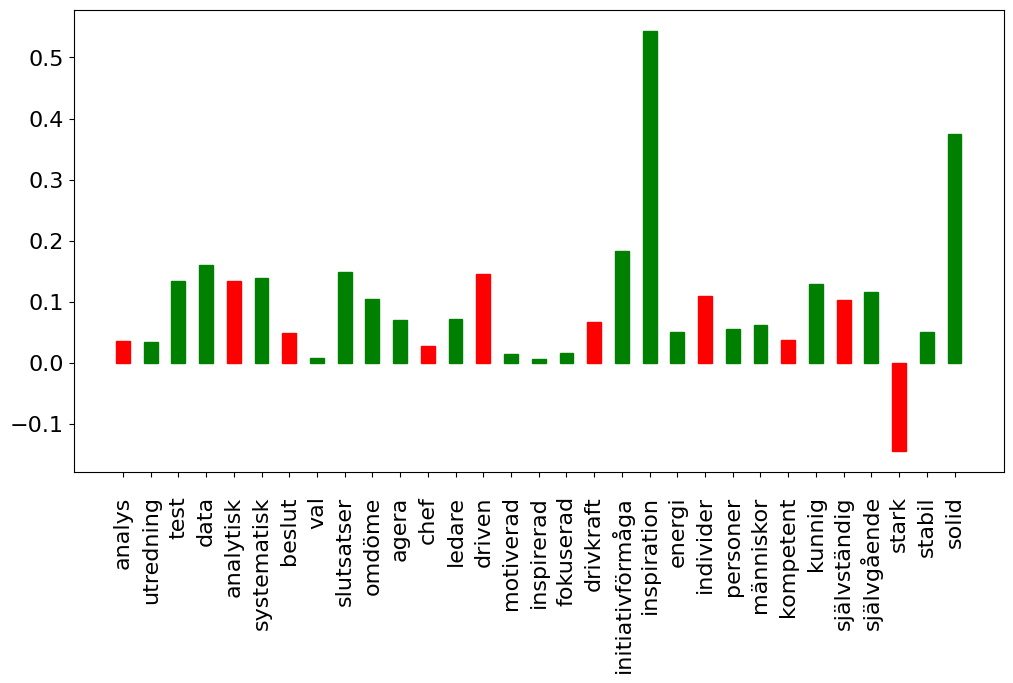

In [45]:
import matplotlib.pyplot as plt

# Define the manually selected words for the red and green columns
red_words = ['analys', 'analytisk', 'beslut', 'chef', 'driven', 'drivkraft', 'individer', 'kompetent', 'självständig', 'stark']
green_words = ['utredning', 'test', 'data', 'systematisk', 'val', 'slutsatser', 'omdöme', 'agera', 'ledare', 'motiverad', 'inspirerad', 'fokuserad', 'initiativförmåga', 'inspiration', 'energi', 'personer', 'människor', 'kunnig', 'självgående', 'stabil', 'solid']

# Filter out keywords that have no sentiment score
data = [(kw, score) for kw, score in zip(keywords, sentiment_scores) if score is not None]

# Separate the filtered data into two lists, for red and green columns
red_data = [(kw, score) for kw, score in data if kw in red_words]
green_data = [(kw, score) for kw, score in data if kw in green_words]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(data)), [x[1] for x in data], align='center', width=0.5)
ax.set_xticks(range(len(data)))
ax.set_xticklabels([x[0] for x in data], fontsize=12)
ax.tick_params(axis='x', labelrotation=90, labelsize=16, pad=14)
ax.tick_params(axis='y', labelsize=16)

# Color the bars for the red and green words differently
for i, (kw, score) in enumerate(data):
    if kw in red_words:
        ax.get_children()[i].set_color('red')
    elif kw in green_words:
        ax.get_children()[i].set_color('green')

plt.show()